In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#wavedata 파형분석2

In [2]:
data = pd.read_csv("data_4b63.csv")

In [3]:
data

,asset_id,created_at,waveform_x,waveform_y,waveform_z,spectrum_x_amp,spectrum_x_freq,spectrum_y_amp,spectrum_y_freq,spectrum_z_amp,spectrum_z_freq
0,4b63fc16-6b90-4823-9622-c8533e7102cc,1704035732,"0.9609375,0.87890625,0.890625,0.984375,0.94921...","0.03515625,0.041015625,0,0,0.09375,0.046875,0....","0.140625,0.087890625,0.1171875,-0.041015625,0....","0.00043434279165473016,0.0005311963691124537,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00023609607587021146,0.000309626389561798,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.000211826618443747,0.00027596053852829526,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
1,4b63fc16-6b90-4823-9622-c8533e7102cc,1704042935,"0.943359375,0.966796875,0.978515625,0.97851562...","0.08203125,0.01171875,0.076171875,-0.005859375...","0.01171875,0.0703125,0.087890625,0.099609375,0...","0.00044874317101385426,0.0003542592720323721,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0006247550362906293,0.0005166412658731118,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","7.469914437609193e-7,0.00019906862043011895,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
2,4b63fc16-6b90-4823-9622-c8533e7102cc,1704050142,"0.87890625,0.955078125,0.896484375,0.955078125...","0.041015625,0.09375,0,0.017578125,-0.087890625...","0.029296875,0.03515625,0.111328125,0.09375,0.0...","0.0005322844711332839,0.0003967618581182954,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00016397062653211448,0.00035434365899301263,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00022877272044835977,0.0004851247687842544,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
3,4b63fc16-6b90-4823-9622-c8533e7102cc,1704057345,"1.0546875,1.025390625,0.9375,0.87890625,1.0546...","0.0234375,0.01171875,0.01171875,0.076171875,0....","0,0.05859375,-0.01171875,-0.041015625,0.064453...","0.0009756771164920727,0.0006798736068514467,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0003881223670872427,0.00028675963949678353,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.000092857155973117,0.00004281449437885992,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
4,4b63fc16-6b90-4823-9622-c8533e7102cc,1704064569,"1.060546875,0.931640625,0.83203125,0.97265625,...","0.123046875,0.111328125,-0.041015625,0.0585937...","0.09375,0.076171875,0.029296875,0.01171875,0.0...","0.00039660351174616664,0.0007532841039737981,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0001094637050017433,0.00025657317311946674,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0000652854558003824,0.00007885897320917104,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
...,...,...,...,...,...,...,...,...,...,...,...
2535,4b63fc16-6b90-4823-9622-c8533e7102cc,1724645798,"0.97265625,0.9375,1.001953125,0.87890625,1.031...","0.134765625,-0.076171875,0,0.005859375,0.19335...","0,0,-0.099609375,-0.005859375,-0.052734375,-0....","0.000028923028420745762,0.00045647874487906914...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00011597048540978956,0.0004737319290376936,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0004465652479474879,0.00037034494767628466,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
2536,4b63fc16-6b90-4823-9622-c8533e7102cc,1724653006,"0.943359375,1.0078125,0.849609375,0.884765625,...","0.01171875,0.205078125,-0.005859375,-0.1289062...","-0.09375,0,0,0.005859375,0,0,0.064453125,-0.08...","0.00011137959203913888,0.00012982848142713326,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0004056949208470027,0.00036037059183819135,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00008134233669934807,0.0003375421111755156,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
2537,4b63fc16-6b90-4823-9622-c8533e7102cc,1724660209,"0.9375,0.873046875,0.796875,1.060546875,1.0429...","-0.10546875,-0.111328125,0.158203125,0.046875,...","-0.029296875,-0

In [4]:
def convert_to_float_list(string):
    return [float(x) for x in string.split(',')]

In [5]:
df_plot = pd.DataFrame({
    'spectrum_x_amp': data['spectrum_x_amp'].apply(convert_to_float_list),
    'spectrum_y_amp': data['spectrum_y_amp'].apply(convert_to_float_list),
    'spectrum_z_amp': data['spectrum_z_amp'].apply(convert_to_float_list),
    'spectrum_x_freq': data['spectrum_x_freq'].apply(convert_to_float_list),
    'spectrum_y_freq': data['spectrum_y_freq'].apply(convert_to_float_list),
    'spectrum_z_freq': data['spectrum_z_freq'].apply(convert_to_float_list),
    'waveform_x': data['waveform_x'].apply(convert_to_float_list),
    'waveform_y': data['waveform_y'].apply(convert_to_float_list),
    'waveform_z': data['waveform_z'].apply(convert_to_float_list),
    'created_at': data['created_at']
})

In [6]:
df_plot

,spectrum_x_amp,spectrum_y_amp,spectrum_z_amp,spectrum_x_freq,spectrum_y_freq,spectrum_z_freq,waveform_x,waveform_y,waveform_z,created_at
0,"[0.00043434279165473016, 0.0005311963691124537...","[0.00023609607587021146, 0.000309626389561798,...","[0.000211826618443747, 0.00027596053852829526,...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.9609375, 0.87890625, 0.890625, 0.984375, 0....","[0.03515625, 0.041015625, 0.0, 0.0, 0.09375, 0...","[0.140625, 0.087890625, 0.1171875, -0.04101562...",1704035732
1,"[0.00044874317101385426, 0.0003542592720323721...","[0.0006247550362906293, 0.0005166412658731118,...","[7.469914437609193e-07, 0.00019906862043011895...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.943359375, 0.966796875, 0.978515625, 0.9785...","[0.08203125, 0.01171875, 0.076171875, -0.00585...","[0.01171875, 0.0703125, 0.087890625, 0.0996093...",1704042935
2,"[0.0005322844711332839, 0.0003967618581182954,...","[0.00016397062653211448, 0.0003543436589930126...","[0.00022877272044835977, 0.0004851247687842544...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.87890625, 0.955078125, 0.896484375, 0.95507...","[0.041015625, 0.09375, 0.0, 0.017578125, -0.08...","[0.029296875, 0.03515625, 0.111328125, 0.09375...",1704050142
3,"[0.0009756771164920727, 0.0006798736068514467,...","[0.0003881223670872427, 0.00028675963949678353...","[9.2857155973117e-05, 4.281449437885992e-05, 0...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[1.0546875, 1.025390625, 0.9375, 0.87890625, 1...","[0.0234375, 0.01171875, 0.01171875, 0.07617187...","[0.0, 0.05859375, -0.01171875, -0.041015625, 0...",1704057345
4,"[0.00039660351174616664, 0.0007532841039737981...","[0.0001094637050017433, 0.00025657317311946674...","[6.52854558003824e-05, 7.885897320917104e-05, ...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[1.060546875, 0.931640625, 0.83203125, 0.97265...","[0.123046875, 0.111328125, -0.041015625, 0.058...","[0.09375, 0.076171875, 0.029296875, 0.01171875...",1704064569
...,...,...,...,...,...,...,...,...,...,...
2535,"[2.8923028420745762e-05, 0.0004564787448790691...","[0.00011597048540978956, 0.0004737319290376936...","[0.0004465652479474879, 0.00037034494767628466...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.97265625, 0.9375, 1.001953125, 0.87890625, ...","[0.134765625, -0.076171875, 0.0, 0.005859375, ...","[0.0, 0.0, -0.099609375, -0.005859375, -0.0527...",1724645798
2536,"[0.00011137959203913888, 0.0001298284814271332...","[0.0004056949208470027, 0.00036037059183819135...","[8.134233669934807e-05, 0.0003375421111755156,...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.943359375, 1.0078125, 0.849609375, 0.884765...","[0.01171875, 0.205078125, -0.005859375, -0.128...","[-0.09375, 0.0, 0.0, 0.005859375, 0.0, 0.0, 0....",1724653006
2537,"[0.0004206991641673902, 0.0003378342948616004,...","[0.000419407966024898, 0.0003610534209018251, ...","[0.00025540540825933384, 0.0006222350810272697...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.0, 0.78125, 1.5625, 2.34375, 3.125, 3.90625...","[0.9375, 0.873046875, 0.796875, 1.060546875, 1...","[-0.10546875, -0.111328125, 0.158203125, 0.046...","[-0.029296875, -0.02343

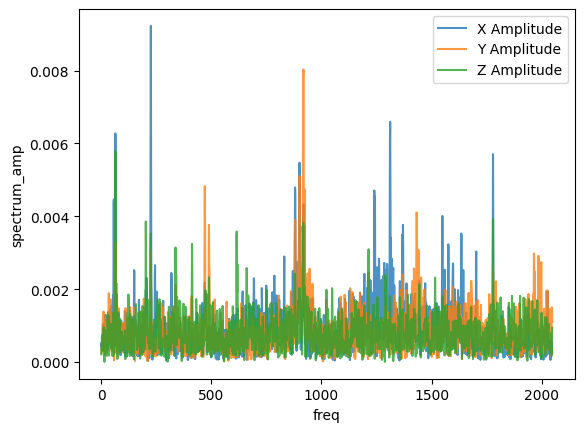

In [7]:
plt.plot(df_plot.loc[0]['spectrum_x_amp'], label='X Amplitude', alpha=0.8)
plt.plot(df_plot.loc[0]['spectrum_y_amp'], label='Y Amplitude', alpha=0.8)
plt.plot(df_plot.loc[0]['spectrum_z_amp'], label='Z Amplitude', alpha=0.8)

plt.xlabel('freq')
plt.ylabel('spectrum_amp')
plt.legend()
plt.title('')
plt.show()

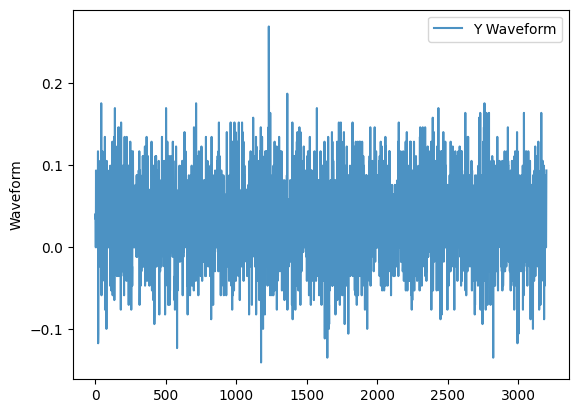

In [8]:
# plt.plot(df_plot.loc[0]['waveform_x'], label='X Waveform', alpha=0.8)
plt.plot(df_plot.loc[0]['waveform_y'], label='Y Waveform', alpha=0.8)
# plt.plot(df_plot.loc[0]['waveform_z'], label='Z Waveform', alpha=0.8)

plt.xlabel('')
plt.ylabel('Waveform')
plt.legend()
plt.title('')
plt.show()